In [2]:
pip install praw


Note: you may need to restart the kernel to use updated packages.


In [3]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="Sd2tPL7OsSYPe29hMu_cOA",
    client_secret="qCTlL8zyiMNWN6RQx5i3cA1TWQ7l9A",
    user_agent=user_agent
)

In [4]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

# marketing subreddit channel

In [5]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("marketing").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

April Classified Ads Thread for /r/marketing - Share Your Business & Services with our Community
1bxsbsu
v022450781
1712454050.0
13
0.89
https://www.reddit.com/r/marketing/comments/1bxsbsu/april_classified_ads_thread_for_rmarketing_share/
0


In [12]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("marketing").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

April Classified Ads Thread for /r/marketing - Share Your Business & Services with our Community
1bxsbsu
v022450781
1712454050.0
13
0.99
https://www.reddit.com/r/marketing/comments/1bxsbsu/april_classified_ads_thread_for_rmarketing_share/
0


# Getting total comments in reddit

In [13]:
headlines = set()
for submission in reddit.subreddit("marketing").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

941


In [14]:
#Create a dataframe from the scrapped data 
marketing_df = pd.DataFrame(headlines)
marketing_df.head()


,0
0,Desperately trying to get out of a bad situation.
1,Is there a way to move from marketing to data?
2,Pact's facebook marketing is a head scratcher ...
3,How easy or difficult would it be to find a re...
4,Question about potential event marketing job o...


In [15]:

marketing_df.head()


,0
0,Desperately trying to get out of a bad situation.
1,Is there a way to move from marketing to data?
2,Pact's facebook marketing is a head scratcher ...
3,How easy or difficult would it be to find a re...
4,Question about potential event marketing job o...


In [16]:
marketing_df.columns

RangeIndex(start=0, stop=1, step=1)

In [27]:
marketing_df.columns = ['Titles']

In [28]:
marketing_df.head()

,Titles
0,Desperately trying to get out of a bad situation.
1,Is there a way to move from marketing to data?
2,Pact's facebook marketing is a head scratcher ...
3,How easy or difficult would it be to find a re...
4,Question about potential event marketing job o...


In [30]:
marketing_df.Titles.duplicated().sum() 

0

In [33]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
marketing_df["Titles"]= marketing_df["Titles"].apply(cleanTxt)

#Show the clean text
marketing_df.head()


,Titles
0,Desperately trying to get out of a bad situation.
1,Is there a way to move from marketing to data?
2,Pact's facebook marketing is a head scratcher ...
3,How easy or difficult would it be to find a re...
4,Question about potential event marketing job o...


In [35]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
marketing_df["Titles"]= marketing_df["Titles"].apply(remove_emoji)

#Show the clean text
marketing_df.head()

,Titles
0,Desperately trying to get out of a bad situation.
1,Is there a way to move from marketing to data?
2,Pact's facebook marketing is a head scratcher ...
3,How easy or difficult would it be to find a re...
4,Question about potential event marketing job o...


In [24]:
!pip install textblob

     -------------------------------------- 626.3/626.3 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.7 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [38]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [45]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
marketing_df['Subjectivity'] = marketing_df['Titles'].apply(getSubjectivity)
marketing_df['Polarity'] = marketing_df['Titles'].apply(getPolarity)

#Now display data
marketing_df.head()

,Titles,Subjectivity,Polarity
0,Desperately trying to get out of a bad situation.,0.833333,-0.650000
1,Is there a way to move from marketing to data?,0.000000,0.000000
2,Pact's facebook marketing is a head scratcher ...,0.000000,0.000000
3,How easy or difficult would it be to find a re...,0.677778,-0.055556
4,Question about potential event marketing job o...,1.000000,0.000000


In [47]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
marketing_df["Insight"] = marketing_df["Polarity"].apply(getInsight)

marketing_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Desperately trying to get out of a bad situation.,0.833333,-0.650000,Negative
1,Is there a way to move from marketing to data?,0.000000,0.000000,Neutral
2,Pact's facebook marketing is a head scratcher ...,0.000000,0.000000,Neutral
3,How easy or difficult would it be to find a re...,0.677778,-0.055556,Negative
4,Question about potential event marketing job o...,1.000000,0.000000,Neutral
5,Any LATAM/Spanish/Hispanic marketers in here?,0.000000,0.000000,Neutral
6,Why has LinkedIn become so weird? Linkedin is ...,0.603333,0.196667,Positive
7,Is website/resource you love mentioned below?,0.600000,0.500000,Positive
8,New Name Suggestion,0.454545,0.136364,Positive
9,Who pays for brand activation at events?,0.000000,0.000000,Neutral


# Data Visualization

In [49]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

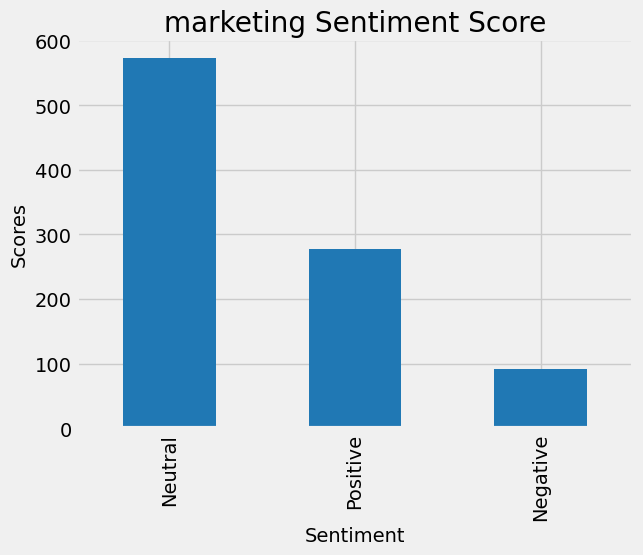

In [50]:
#Plot the values count of sentiment
plt.title("marketing Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
marketing_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()


# Word Cloud

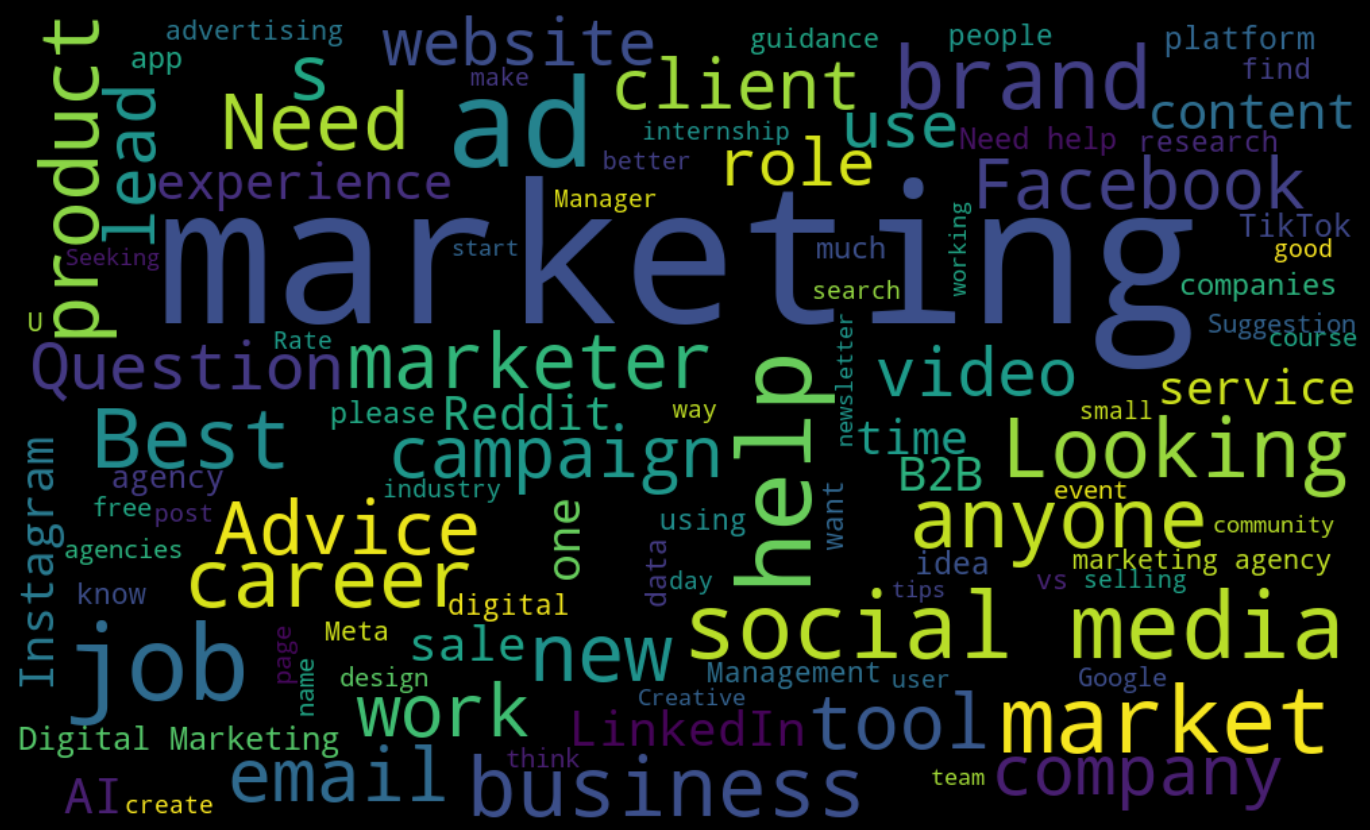

In [51]:
text = ' '.join( [twts for twts in marketing_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");
